In [42]:
import tensorflow as tf

# dataset download, process, and plot

In [43]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

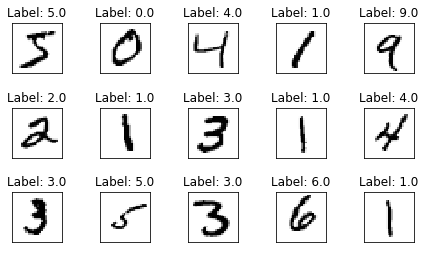

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)  # row, col, index
    plt.tight_layout()  # auto layout
    plt.imshow(x_train[i], cmap='Greys')
    plt.title("Label: {}".format(y_train[i]))
    plt.xticks([])  # delete x ticks
    plt.yticks([])

# Sequential model

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


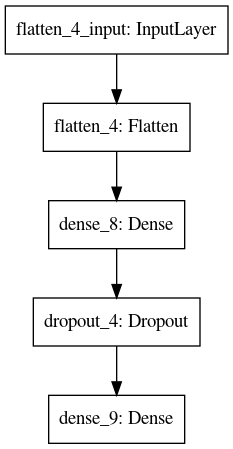

In [49]:
tf.keras.utils.plot_model(model, 'mnist_model.png')

In [50]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.7460 - accuracy: 0.7449
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5946 - accuracy: 0.8438
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5142 - accuracy: 0.8631
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4531 - accuracy: 0.8822
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4233 - accuracy: 0.8887


In [52]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.9347


[0.2590353190898895, 0.9347000122070312]

# Save model as .savedmodel

In [53]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model/assets


# Save model as HDF5

In [54]:
model.save('mnist_model.h5')

# Using tf.keras to manage functional API

In [55]:
# reset notebook's state (clear)
tf.keras.backend.clear_session()

# Define model input using tf.keras.Input

In [56]:
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

In [57]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_model2')

In [58]:
model.summary()

Model: "mnist_model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


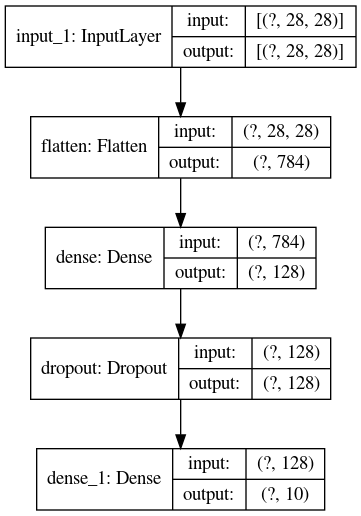

In [59]:
tf.keras.utils.plot_model(model, model.name+'.png', show_shapes=True, show_layer_names=True)

In [60]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [61]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5702 - accuracy: 0.7327
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6198 - accuracy: 0.8316
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5099 - accuracy: 0.8610
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4460 - accuracy: 0.8807
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4186 - accuracy: 0.8878


In [62]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.9270


[0.3035370409488678, 0.9269999861717224]

# Model save and load